# Question 2

## b)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

tau_400 = 10 # min^-1
k_400 = 1 # min^-1
K_400 = 100 # dimless

print(f"Conversion at 400 K: {(tau_400 * k_400)/(1 + (k_400*tau_400) + (tau_400 * k_400/K_400))}")
print(f"G at 400 K: {80000*(tau_400 * k_400)/(1 + (k_400*tau_400) + (tau_400 * k_400/K_400))}")

Conversion at 400 K: 0.9009009009009009
G at 400 K: 72072.07207207207


## c)

In [20]:
kappa = 3600/400 # dimless
T = 400
Ta = 310
T0 = 310
CA0 = 40

CA0*((T - T0) + kappa * (T - Ta))

36000.0

## d)

Intersection at T = 417.92 K


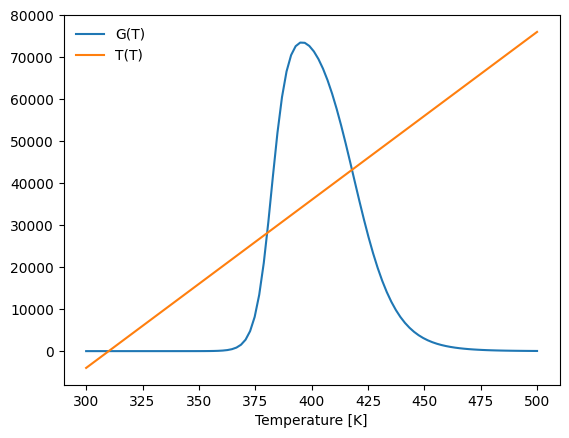

Conversion at 310 K: 2.0368486395586337e-11
Conversion at 380 K: 0.3326960257477427
Conversion at 418 K: 0.5372614953755962


In [44]:
from scipy.optimize import root_scalar


def rate_constant(T):
    return k_400 * np.exp(20000 * (1/T - 1/400))

def equilibrium_constant(T):
    return K_400 * np.exp(-80000/1.987 * (1/T - 1/400))

def G(T):
    k = rate_constant(T)
    K = equilibrium_constant(T)
    return 80000*(tau_400 * k)/(1 + (k*tau_400) + (tau_400 * k/K))

def R(T):
    return 40 * ((T - T0) + kappa * (T - Ta))

temp_range = np.linspace(300, 500, 100)

def difference(T):
    return G(T) - R(T)

# Solve for the root (intersection point)
solution = root_scalar(difference, bracket=[400, 500], method='brentq')

if solution.converged:
    print(f"Intersection at T = {solution.root:.2f} K")
else:
    print("No intersection found in the given range.")

plt.plot(temp_range, G(temp_range), label = 'G(T)')
plt.plot(temp_range, R(temp_range), label = 'T(T)')
plt.xlabel("Temperature [K]")
plt.legend(frameon = False)
plt.show();

print(f"Conversion at 310 K: {G(310)/80000}")
print(f"Conversion at 380 K: {G(380)/80000}")
print(f"Conversion at 418 K: {G(418)/80000}")

## e)

Intersection at T = 310.00 K


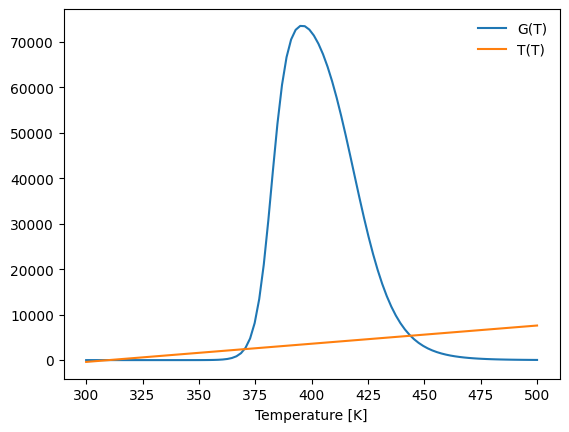

Conversion at 310 K: 2.0368486395586337e-11
Conversion at 370.29 K: 0.030153969337099573
Conversion at 443.83 K: 0.06691230460939515


In [48]:
def G(T):
    k = rate_constant(T)
    K = equilibrium_constant(T)
    return 80000*(tau_400 * k)/(1 + (k*tau_400) + (tau_400 * k/K))

def R_no_cooling(T):
    return 40 * ((T - T0))

temp_range = np.linspace(300, 500, 100)

def difference_no_cooling(T):
    return G(T) - R_no_cooling(T)

# Solve for the root (intersection point)
solution = root_scalar(difference_no_cooling, bracket=[300, 350], method='brentq')

if solution.converged:
    print(f"Intersection at T = {solution.root:.2f} K")
else:
    print("No intersection found in the given range.")

plt.plot(temp_range, G(temp_range), label = 'G(T)')
plt.plot(temp_range, R_no_cooling(temp_range), label = 'T(T)')
plt.xlabel("Temperature [K]")
plt.legend(frameon = False)
plt.show();

print(f"Conversion at 310 K: {G(310)/80000}")
print(f"Conversion at 370.29 K: {G(370.29)/80000}")
print(f"Conversion at 443.83 K: {G(443.83)/80000}")

# Question 3

z value for max theta: 2.929292929292929
Max Theta: 0.09223175758191177


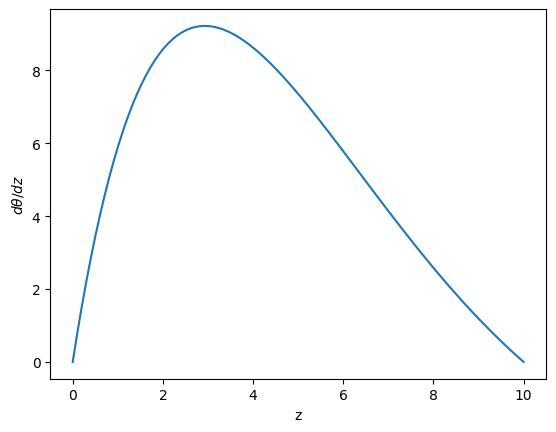

In [83]:
def d_theta(a, b, z):
    return -a * z * (b*z - 2) * np.exp(- b * z)

z = np.linspace(0, 10, 100)

max_index = np.argmax(d_theta(a = 4, b = 0.2, z = z)) # find max dθ/dz value

print(f"z value for max theta: {z[max_index]}")
print(f"Max Theta: {d_theta(a = 4, b = 0.2, z = z)[max_index]/100}")

plt.plot(z, d_theta(a = 4, b = 0.2, z = z))
plt.xlabel("z")
plt.ylabel(r"$d \theta / d z$")
plt.show();

# Question 4

## e)

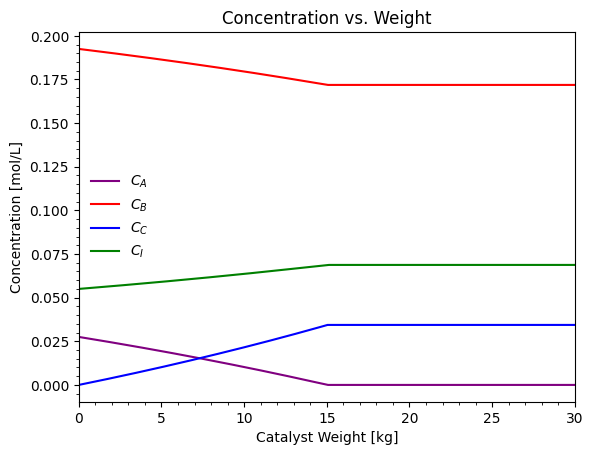

In [57]:
from scipy.integrate import odeint

# Constants
k = 0.05 # [mol o-cresol/(kg-cat min atm)]
W = 30 # [kg] (catalyst mass)
P = 10 # [atm]
epsilon = -0.2 # [-]
T = 170 + 273.15 # [K]
R = 0.08206 # [L atom /(mol K)]

# Initial conditions
yA0 = 0.1 # [mol/mol]
yB0 = 0.7 # [mol/mol]
yI0 = 0.2 # [mol/mol]
P_A0 = P*yA0 # [atm]
P_B0 = P*yB0 # [atm]
P_I0 = P*yI0 # [atm]
FT0 = 50 # [mol/min]
FA0 = FT0*yA0 # [mol/min]
FB0 = FT0*yB0 # [mol/min]
FI0 = FT0*yI0 # [mol/min]
thetaB = FB0/FA0 # [-]
thetaI = FI0/FA0 # [-]
CA0 = P_A0/R/T
X0 = 0 # Conversion is initially 0

# Initial conditions vector [X0, p0, T0, Ta0]
# x0 = [X0, p0, T0, Ta0]
x0 = [X0]

def odes(x, W):
  # x is a vector containing [X0]
  X = x[0]

  # Defining ODEs
  if X <= 1:
    dXdW = k*P_A0*(7-2*X)/(1-0.2*X)/FA0
  else:
     dXdW = 0
  return [dXdW]

# Test the defined ODEs
# print(odes(x=x0,W=0))

def CA(X):
    CA = CA0*(1-X)/(1+epsilon*X)
    return CA

def CB(X):
    CB = CA0*(thetaB-2*X)/(1+epsilon*X)
    return CB

def CC(X):
    CC = CA0*(X)/(1+epsilon*X)
    return CC

def CI(X):
    CI = CA0*(thetaI)/(1+epsilon*X)
    return CI

def rate(CB):
    rate = k*CB*R*T
    return rate

# Declare a weight vector
pW = np.linspace(0, W, 1000)
x = odeint(odes, x0, pW)

# Setting data
X = x[:,0]
CA = CA(X)
CB = CB(X)
CC = CC(X)
CI = CI(X)
rate = rate(CB)

plt.plot(pW, CA, color='purple', linestyle = '-', marker = 'none',label=r'$C_A$')
plt.plot(pW, CB, color='red', linestyle = '-', marker = 'none',label=r'$C_B$')
plt.plot(pW, CC, color='blue', linestyle = '-', marker = 'none',label=r'$C_C$')
plt.plot(pW, CI, color='green', linestyle = '-', marker = 'none',label=r'$C_I$')


plt.xlim(0, W)
plt.legend(frameon = False)
plt.minorticks_on()
plt.title('Concentration vs. Weight')
plt.xlabel('Catalyst Weight [kg]')
plt.ylabel('Concentration [mol/L]')
# plt.savefig("/Users/mohan/Desktop/e_conc_vs_weight.png", dpi = 400)
plt.show()

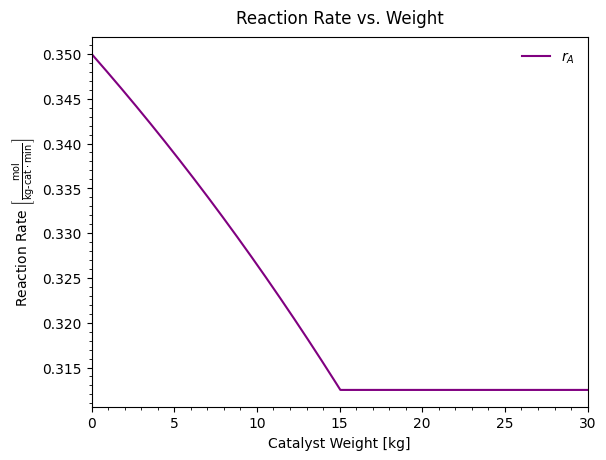

In [58]:
plt.plot(pW, rate, color='purple', linestyle = '-', marker = 'none',label=r'$r_A$')

# General plot settings
plt.xlim(0, W)
plt.legend(frameon = False)
plt.minorticks_on()
plt.title('Reaction Rate vs. Weight', pad=10)
plt.xlabel('Catalyst Weight [kg]')
plt.ylabel(r'Reaction Rate $\left[ \frac{\text{mol}}{\text{kg-cat} \cdot \text{min}} \right]$')
# plt.savefig("/Users/mohan/Desktop/e_rate_vs_weight.png", dpi = 400)
plt.show()

## f)

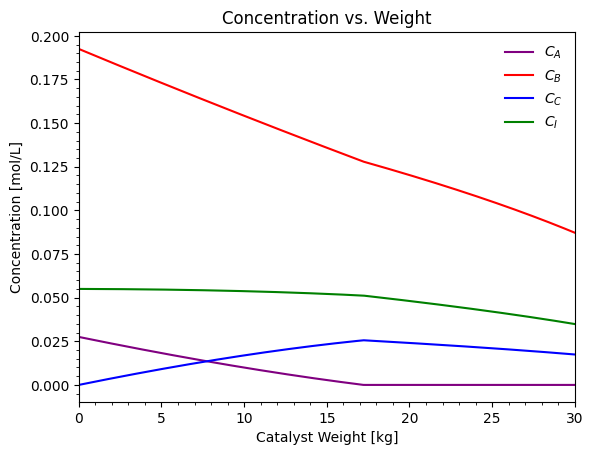

In [ ]:
# Constants
k = 0.05 # [mol o-cresol/(kg-cat min atm)]
W = 30 # [kg] (catalyst mass)
epsilon = -0.2 # [-]
T = 170 + 273.15 # [K]
R = 0.08206 # [L atom /(mol K)]
alpha = 0.029 # [1/kg]
P = 10 # [atm]

# Initial conditions
yA0 = 0.1 # [mol/mol]
yB0 = 0.7 # [mol/mol]
yI0 = 0.2 # [mol/mol]
P_A0 = P*yA0 # [atm]
P_B0 = P*yB0 # [atm]
P_I0 = P*yI0 # [atm]
FT0 = 50 # [mol/min]
FA0 = FT0*yA0 # [mol/min]
FB0 = FT0*yB0 # [mol/min]
FI0 = FT0*yI0 # [mol/min]
thetaB = FB0/FA0 # [-]
thetaI = FI0/FA0 # [-]
CA0 = P_A0/R/T
X0 = 0 # Conversion is initially 0
P0 = 10 # [atm]
y0 = 1 # [pressure ratio is initally 1]

# Initial conditions vector [X0, p0, T0, Ta0]
# x0 = [X0, p0, T0, Ta0]
x0 = [X0, y0]

def odes(x, W):
  # x is a vector containing [X0]
  X = x[0]
  y = x[1]
  # Defining ODEs
  # Conditions that have to be satisfied (CA can't be lower than 1, which is the same as conversion being capped at one) and y can't be negative
  if X < 1:
    dXdW = k*y*P_A0*(7-2*X)/(1+epsilon*X)/FA0
  else:
    dXdW = 0
  if y > 0:
    dydW = -alpha/(2*y)*(1+epsilon*X)
  else:
    dydW = 0
  return [dXdW, dydW]

# Test the defined ODEs
# print(odes(x=x0,W=0))

def CA(X, y):
    CA = CA0*(1-X)/(1+epsilon*X)*y
    return CA

def CB(X, y):
    CB = CA0*(thetaB-2*X)/(1+epsilon*X)*y
    return CB

def CC(X, y):
    CC = CA0*(X)/(1+epsilon*X)*y
    return CC

def CI(X, y):
    CI = CA0*(thetaI)/(1+epsilon*X)*y
    return CI

def rate(CB):
    rate = k*CB*R*T
    return rate

# Declare a weight vector
pW = np.linspace(0, W, 1000)
x = odeint(odes, [X0, y0], pW)

# Setting data
X = x[:,0]
y = x[:,1]
CA = CA(X, y)
CB = CB(X, y)
CC = CC(X, y)
CI = CI(X, y)
rate = rate(CB)
# P = y*P0

plt.plot(pW, CA, color='purple', linestyle = '-', marker = 'none',label=r'$C_A$')
plt.plot(pW, CB, color='red', linestyle = '-', marker = 'none',label=r'$C_B$')
plt.plot(pW, CC, color='blue', linestyle = '-', marker = 'none',label=r'$C_C$')
plt.plot(pW, CI, color='green', linestyle = '-', marker = 'none',label=r'$C_I$')

plt.xlim(0, W)
plt.legend(frameon = False)
plt.minorticks_on()
plt.title('Concentration vs. Weight')
plt.xlabel('Catalyst Weight [kg]')
plt.ylabel('Concentration [mol/L]')
# plt.savefig("/Users/mohan/Desktop/f_conc_vs_weight.png", dpi = 400)
plt.show()

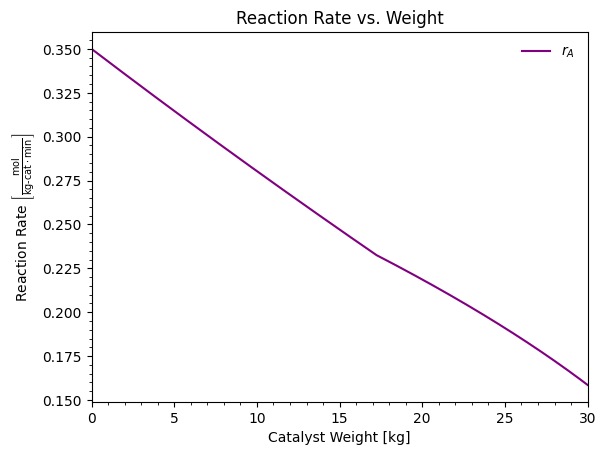

In [ ]:
# Plot the results
plt.plot(pW, rate, color='purple', linestyle = '-', marker = 'none',label=r'$r_A$')

# General plot settings
plt.xlim(0, W)
plt.legend(frameon = False)
plt.minorticks_on()
plt.title('Reaction Rate vs. Weight')
plt.xlabel('Catalyst Weight [kg]')
plt.ylabel(r'Reaction Rate $\left[ \frac{\text{mol}}{\text{kg-cat} \cdot \text{min}} \right]$')
# plt.savefig("/Users/mohan/Desktop/f_rate_vs_weight.png", dpi = 400)
plt.show()

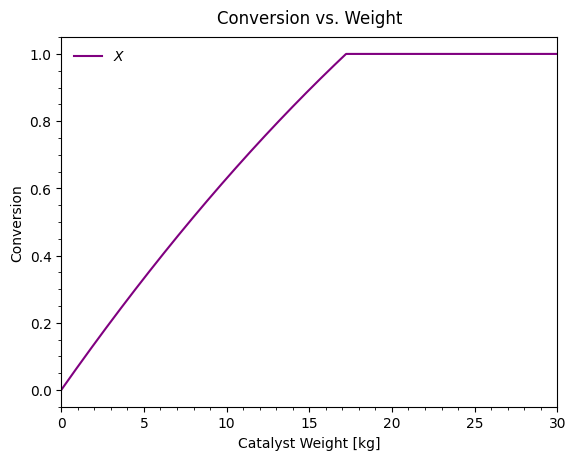

In [ ]:
plt.plot(pW, X, color='purple', linestyle = '-', marker = 'none',label=r'$X$')

plt.xlim(0, W)
plt.legend(frameon = False)
plt.minorticks_on()
plt.title('Conversion vs. Weight', pad=10)
plt.xlabel('Catalyst Weight [kg]')
plt.ylabel('Conversion')
# plt.savefig("/Users/mohan/Desktop/f_conversion_vs_weight.png", dpi = 400)
plt.show()

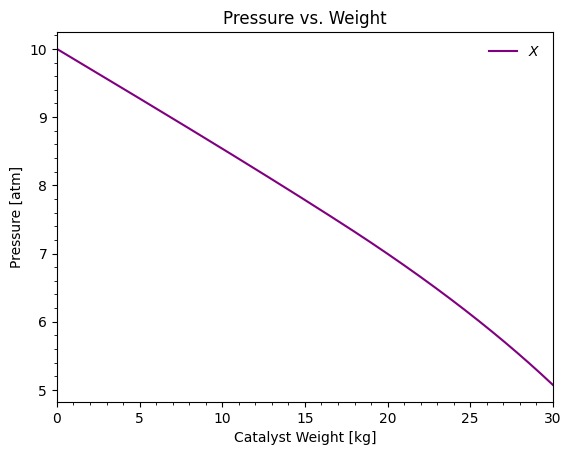

In [ ]:
# Plot the results
plt.plot(pW, y*P0, color='purple', linestyle = '-', marker = 'none',label=r'$X$')

# General plot settings
plt.xlim(0, W)
plt.legend(frameon = False)
plt.minorticks_on()
plt.title('Pressure vs. Weight')
plt.xlabel('Catalyst Weight [kg]')
plt.ylabel('Pressure [atm]')
# plt.savefig("/Users/mohan/Desktop/f_pressure_vs_weight.png", dpi = 400)
plt.show()